<a href="https://colab.research.google.com/github/sharvaree1921/Audio_Controlled_Drone/blob/main/Audio_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# waveform
# fft-> spectrum
# stfy-> spectrogram
# MFCCs

In [8]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
file = "gdrive/My Drive/Audio_Controlled_Drone/1083.wav"

In [5]:
signal, sr = librosa.load(file, sr=22050)
# sr is sampling rate
# signal is numpy array, we gonna have amplitude of the waveform
# sr*T -> 22050*5 is the size of 'signal' with duration 'T' sec of the sound

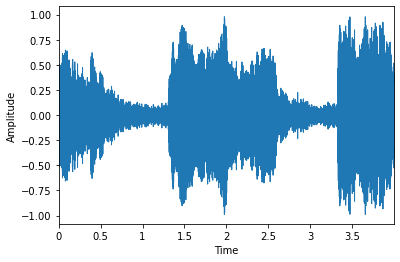

In [6]:
# For visualizing the waveform
librosa.display.waveplot(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

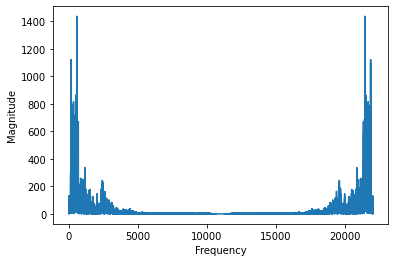

In [9]:
# Moving from time domain to frequency domain
# fft-> spectrum
fft = np.fft.fft(signal)
#fft is one-d numpy array i.e. 22050*5 values

# We want to get the magnitude of the complex values, we do the following
magnitude = np.abs(fft) # contribution of each frquency
frequency = np.linspace(0, sr, len(magnitude))

plt.plot(frequency, magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

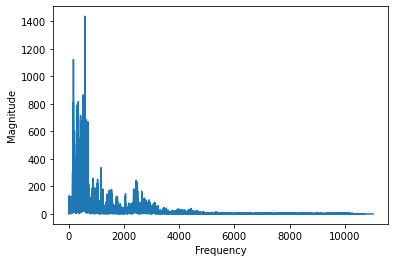

In [11]:
# Note that the plot of 'power spectrum' is symmetrical
# Observe that, most of the energy is concentrated in the lower frequencies and less contribution by high frequencies
# The symmetry can be related to the Nyquist plot of Digital Signal Processing
# Consider only first half

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]

plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

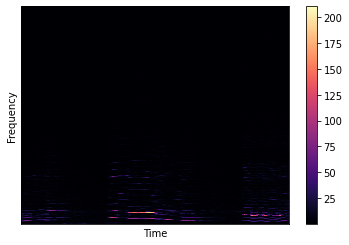

In [12]:
# This is like static snapshot. We want it throughout the time series
# Hence, we perform stft

n_fft = 2048 # no. of samples per fft(like the window we are considering for a singlr frame)
hop_length = 512 # the sliding interval of the frame

stft = librosa.core.stft(signal, hop_length = hop_length, n_fft = n_fft)
spectrogram = np.abs(stft)

librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)  #specshow like heatmap to visualize data
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

In [13]:
# Most of the frequencies have very very lower amplitudes except in some time at middle
# Most of the energy is contained by lower frequencies

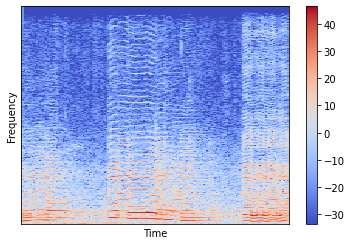

In [14]:
# just converted to decibels or to log scale for better visualization
log_spectrogram = librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)  #specshow like heatmap to visualize data
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

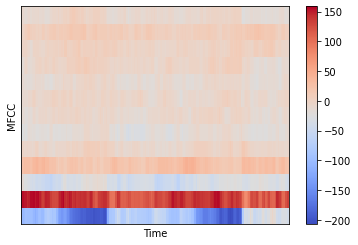

In [16]:
# Visualizing using MFCCs
# For plotting MFCC, STFT is must
MFCCs = librosa.feature.mfcc(signal, n_fft = n_fft, hop_length = hop_length, n_mfcc = 13)
# n_mfcc is the no. of coefficients passed
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)  #specshow like heatmap to visualize data
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()

In [17]:
# Each interval is like cofficient. There are 13 in total
# One can see how the MFCC evolve over time by listening to the original audio file.